# Prophet

Prophet es una librería de Python desarrollada por Facebook para hacer predicciones de series de tiempo.

https://becominghuman.ai/unlocking-the-power-of-time-series-forecasting-a-step-by-step-guide-with-code-examples-in-python-30447ba863b5

![](prophet.png)

La librería Prophet no utiliza redes neuronales. Prophet se basa en un modelo estadístico no paramétrico denominado **modelo de suavizado exponencial de tendencia**. Este modelo se utiliza para modelar el comportamiento de una serie temporal en función de tres componentes: la tendencia, los ciclos sazonales y los eventos puntuales.

11:19:40 - cmdstanpy - INFO - Chain [1] start processing
11:19:40 - cmdstanpy - INFO - Chain [1] done processing


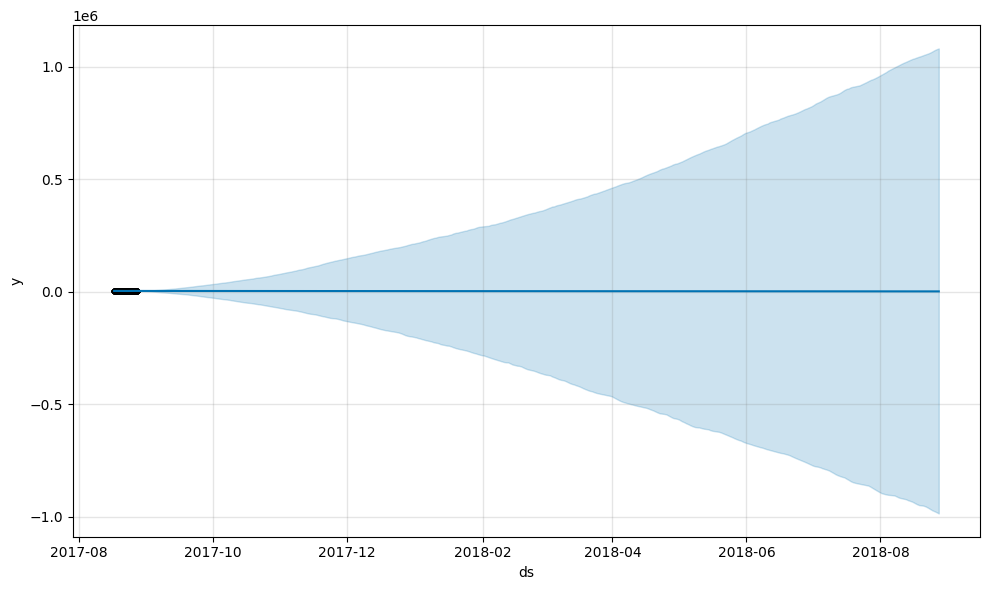

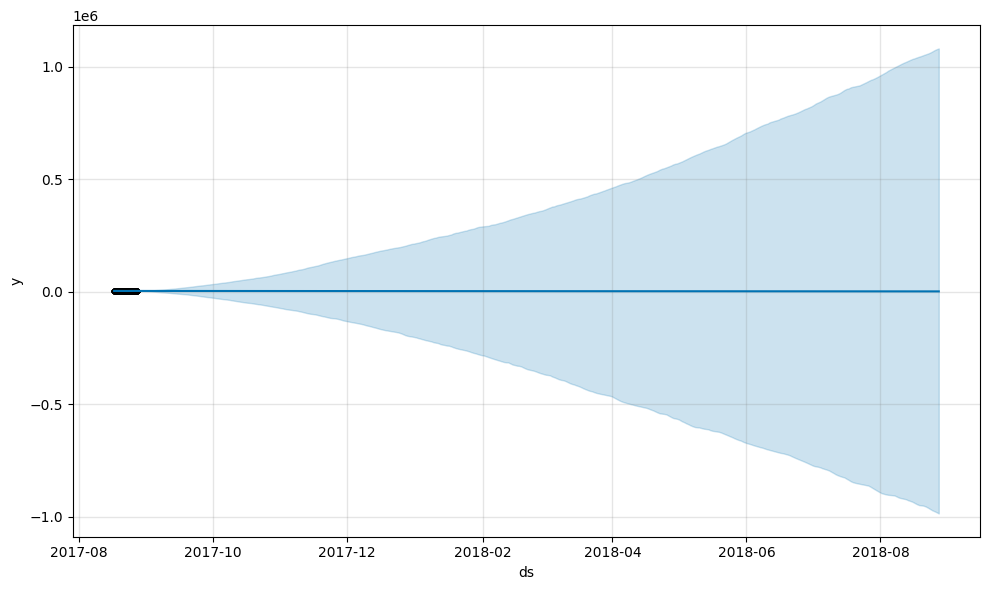

In [88]:
# pip install prophet
from prophet import Prophet
import pandas as pd

# Load the time series data 
data = pd.read_csv("bitcoin1000.csv")

# Prepare su conjunto de datos, con una columna "ds" que contenga las fechas y una columna "y" que contenga los valores a predecir.
data = data.rename(columns={"time": "ds", "price": "y"})

# Fit the Prophet model
# Cree una instancia de Prophet 
model = Prophet()
# Entrene el modelo con su conjunto de datos
model.fit(data)

# Cree un DataFrame para hacer predicciones
future = model.make_future_dataframe(periods=365) # "periods" es el número de períodos en el futuro que desea predecir.

# Haga las predicciones
forecast = model.predict(future)

# Grafique las predicciones
model.plot(forecast)

Ten en cuenta que Prophet es un modelo de series de tiempo con un enfoque estadístico, por lo que es importante revisar los datos para estacionariedad y eliminar tendencias y sazonalidad antes de usarlo. Además, Prophet tiene una serie de parámetros y opciones avanzadas que te pueden ayudar a mejorar las predicciones, como incluir regresores exógenos, cambios puntuales y cambios de tendencia.

 - La **estacionariedad** (stationarity) se refiere a la propiedad de una serie temporal de tener un comportamiento constante en el tiempo. Es decir, si una serie temporal es estacionaria, significa que su media, varianza y distribución de probabilidad son constantes a lo largo del tiempo.

 - La **sazonalidad** (seasonality) se refiere a patrones periódicos en una serie temporal, que se repiten en intervalos regulares, como días, semanas, meses o años. Por ejemplo, las ventas de una tienda pueden ser más altas durante las vacaciones de verano y más bajas durante los meses de invierno.

In [89]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-17 04:00:00,4339.493719,4274.148175,4.386785e+03,4339.493719,4.339494e+03,-8.412850,-8.412850,-8.412850,-8.412850,-8.412850,-8.412850,0.0,0.0,0.0,4331.080870
1,2017-08-17 04:15:00,4340.742369,4275.474048,4.386163e+03,4340.742369,4.340742e+03,-11.033210,-11.033210,-11.033210,-11.033210,-11.033210,-11.033210,0.0,0.0,0.0,4329.709158
2,2017-08-17 04:30:00,4341.991018,4270.470667,4.389034e+03,4341.991018,4.341991e+03,-13.709879,-13.709879,-13.709879,-13.709879,-13.709879,-13.709879,0.0,0.0,0.0,4328.281139
3,2017-08-17 04:45:00,4343.239667,4268.255830,4.385716e+03,4343.239667,4.343240e+03,-16.375998,-16.375998,-16.375998,-16.375998,-16.375998,-16.375998,0.0,0.0,0.0,4326.863669
4,2017-08-17 05:00:00,4344.488316,4263.994458,4.384001e+03,4344.488316,4.344488e+03,-18.950888,-18.950888,-18.950888,-18.950888,-18.950888,-18.950888,0.0,0.0,0.0,4325.537428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,2018-08-23 13:45:00,2304.245222,-964888.453592,1.063548e+06,-964827.052017,1.063567e+06,0.140426,0.140426,0.140426,0.140426,0.140426,0.140426,0.0,0.0,0.0,2304.385648
1361,2018-08-24 13:45:00,2298.691043,-970834.370413,1.068670e+06,-970836.537630,1.068635e+06,0.140426,0.140426,0.140426,0.140426,0.140426,0.140426,0.0,0.0,0.0,2298.831469
1362,2018-08-25 13:45:00,2293.136865,-975024.732477,1.074349e+06,-974994.507082,1.074325e+06,0.140426,0.140426,0.140426,0.140426,0.140426,0.140426,0.0,0.0,0.0,2293.277291
1363,2018-08-26 13:45:00,2287.582687,-979687.486580,1.078948e+06,-979708.819760,1.078897e+06,0.140426,0.140426,0.140426,0.140426,0.140426,0.140426,0.0,0.0,0.0,2287.723113


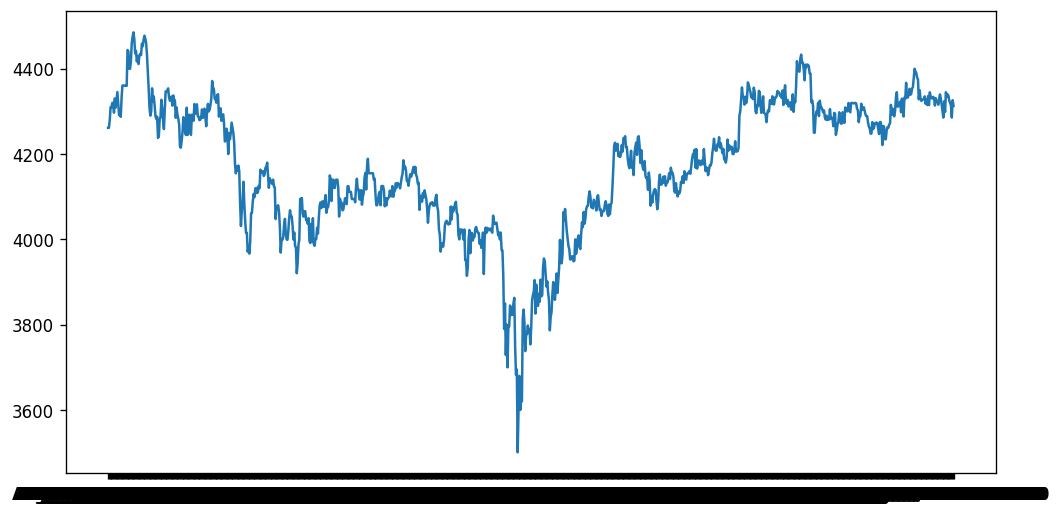

In [90]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})

plt.plot(data["ds"], data["y"])
# plt.plot(forecast["ds"], forecast["trend"])

In [91]:
data

,ds,y
0,"Aug 17, 2017 04:00:00",4261.48
1,"Aug 17, 2017 04:15:00",4261.48
2,"Aug 17, 2017 04:30:00",4280.00
3,"Aug 17, 2017 04:45:00",4310.07
4,"Aug 17, 2017 05:00:00",4308.83
...,...,...
995,"Aug 27, 2017 12:45:00",4319.66
996,"Aug 27, 2017 13:00:00",4314.11
997,"Aug 27, 2017 13:15:00",4285.54
998,"Aug 27, 2017 13:30:00",4326.34


***

Veamos cómo hacer un **resample** y obtener una fila por día a partir de los datos de un dataframe:

Nota: antes, asegurarse de que el índice del dataframe esté configurado como un objeto de tipo DatetimeIndex.

Aplicar el método resample a los datos del dataframe, especificando el parámetro 'D' para indicar que se desea una fila por día.

Agregar una función de agregación para los valores del dataframe que se agruparán en cada día. En este caso, se puede usar 'first' para tomar el primer valor de cada día.

In [92]:
data = data.rename(columns={'ds': 'fecha'})
data.index = pd.to_datetime(data["fecha"])
data = data.drop("fecha", axis=1)
data

,y
fecha,
2017-08-17 04:00:00,4261.48
2017-08-17 04:15:00,4261.48
2017-08-17 04:30:00,4280.00
2017-08-17 04:45:00,4310.07
2017-08-17 05:00:00,4308.83
...,...
2017-08-27 12:45:00,4319.66
2017-08-27 13:00:00,4314.11
2017-08-27 13:15:00,4285.54


In [93]:
daily = data.resample('D').first()
daily

,y
fecha,
2017-08-17,4261.48
2017-08-18,4285.08
2017-08-19,4108.37
2017-08-20,4120.98
2017-08-21,4069.13
2017-08-22,4016.00
2017-08-23,4040.00
2017-08-24,4147.00
2017-08-25,4316.01


In [94]:
# Prophet necesita dos columnas (no un índice) ds e y
daily["ds"] = daily.index
daily

,y,ds
fecha,,
2017-08-17,4261.48,2017-08-17
2017-08-18,4285.08,2017-08-18
2017-08-19,4108.37,2017-08-19
2017-08-20,4120.98,2017-08-20
2017-08-21,4069.13,2017-08-21
2017-08-22,4016.00,2017-08-22
2017-08-23,4040.00,2017-08-23
2017-08-24,4147.00,2017-08-24
2017-08-25,4316.01,2017-08-25


11:19:46 - cmdstanpy - INFO - Chain [1] start processing
11:19:46 - cmdstanpy - INFO - Chain [1] done processing


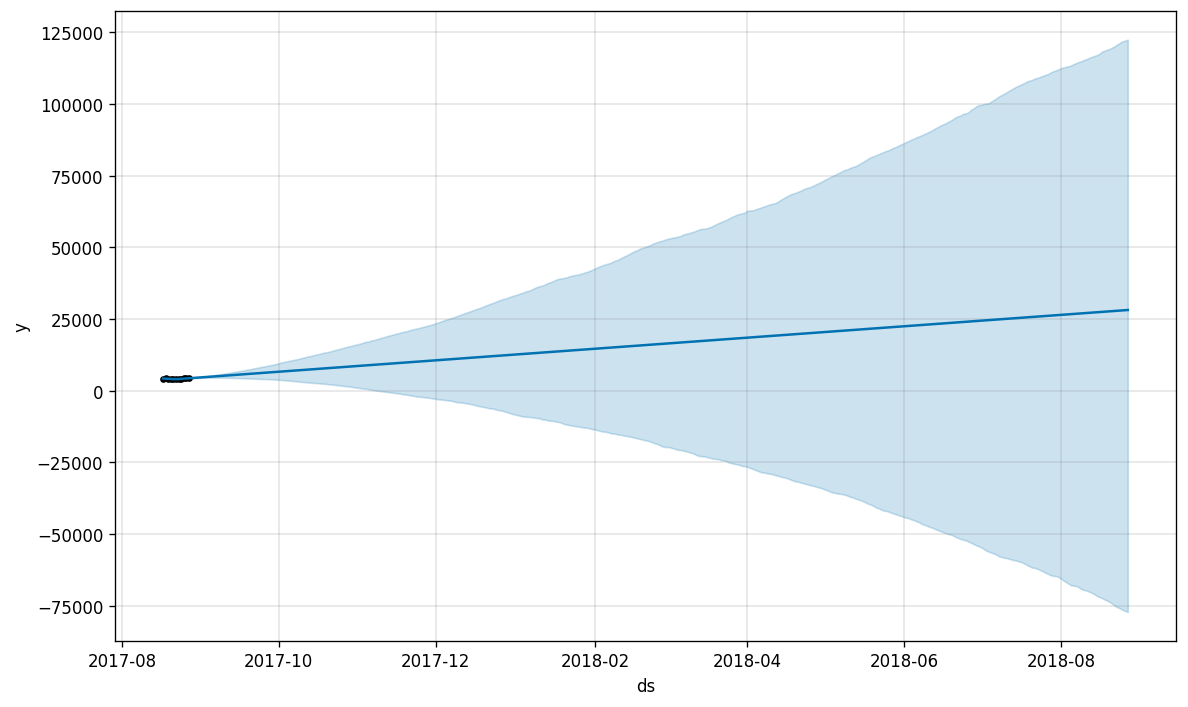

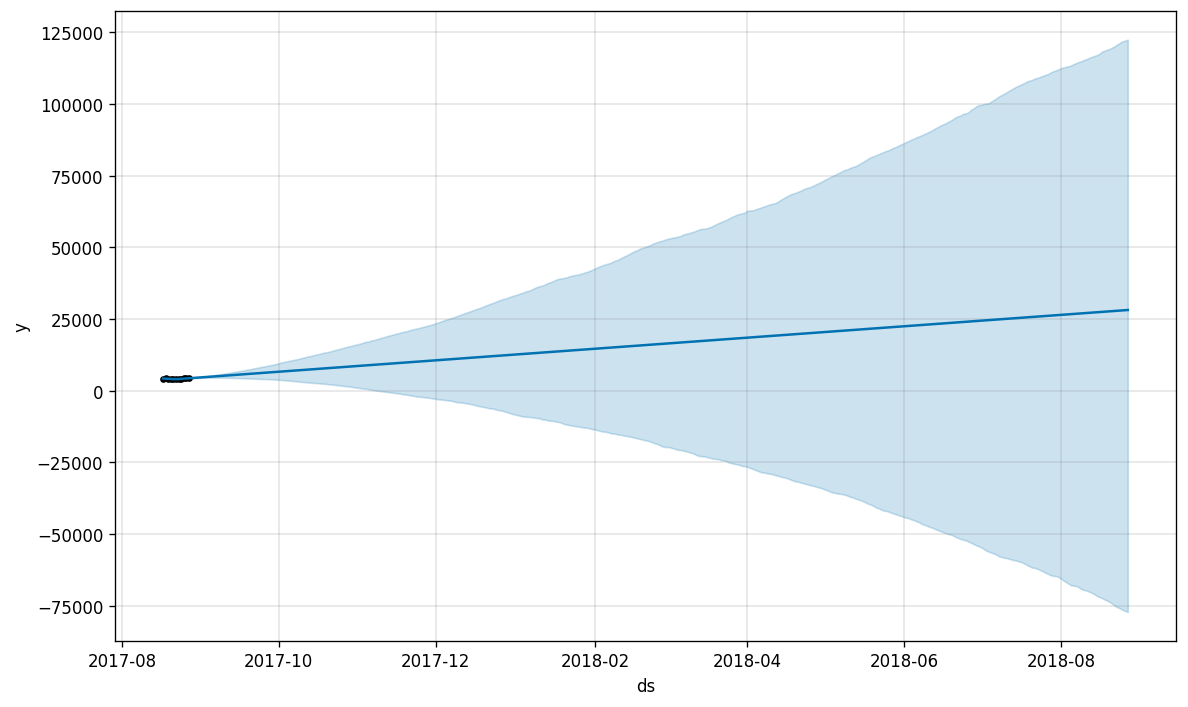

In [95]:
# Fit the Prophet model
# Cree una instancia de Prophet 
model = Prophet()
# Entrene el modelo con su conjunto de datos
model.fit(daily)

# Cree un DataFrame para hacer predicciones
future = model.make_future_dataframe(periods=365) # "periods" es el número de períodos en el futuro que desea predecir.

# Haga las predicciones
forecast = model.predict(future)

# Grafique las predicciones
model.plot(forecast)

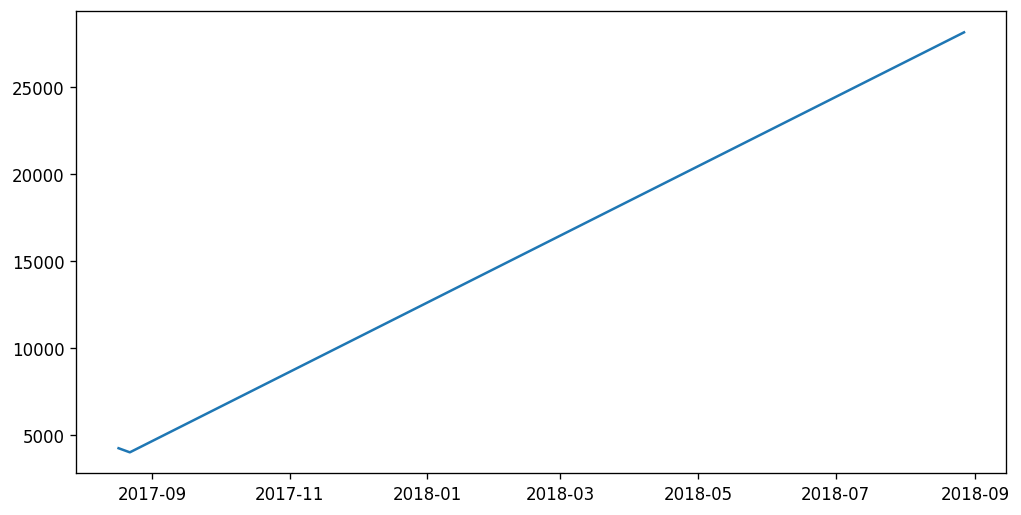

In [96]:
plt.plot(forecast["ds"], forecast["trend"])
plt.show()

In [97]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-17,4263.007875,4207.255237,4315.208561,4263.007875,4263.007875,0.0,0.0,0.0,0.0,0.0,0.0,4263.007875
1,2017-08-18,4215.618447,4164.091937,4269.515033,4215.618447,4215.618447,0.0,0.0,0.0,0.0,0.0,0.0,4215.618447
2,2017-08-19,4168.229019,4112.983258,4224.133353,4168.229019,4168.229019,0.0,0.0,0.0,0.0,0.0,0.0,4168.229019
3,2017-08-20,4120.864767,4064.879355,4172.674872,4120.864767,4120.864767,0.0,0.0,0.0,0.0,0.0,0.0,4120.864767
4,2017-08-21,4073.525173,4022.091655,4130.459818,4073.525173,4073.525173,0.0,0.0,0.0,0.0,0.0,0.0,4073.525173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,2018-08-23,27901.440298,-75537.815763,120836.085584,-75519.775940,120786.646293,0.0,0.0,0.0,0.0,0.0,0.0,27901.440298
372,2018-08-24,27966.673145,-75911.105343,121417.101392,-75944.917936,121473.427227,0.0,0.0,0.0,0.0,0.0,0.0,27966.673145
373,2018-08-25,28031.905992,-76463.299206,121910.972173,-76517.808721,121881.785945,0.0,0.0,0.0,0.0,0.0,0.0,28031.905992
374,2018-08-26,28097.138840,-76806.715253,122117.861876,-76850.908603,122121.634760,0.0,0.0,0.0,0.0,0.0,0.0,28097.138840


In [98]:
df = pd.read_csv("Bitcoin Historical Data - Investing.com.csv", delimiter = ",", parse_dates=['Date'], index_col='Date')
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-02-11,"21,649.4","21,767.4","21,627.6","21,760.0",0,0
2023-02-10,"21,819.0","21,941.1","21,539.3","21,651.1",0,0
2023-02-09,"22,946.5","22,996.4","21,773.9","21,819.0",0,0
2023-02-08,"23,263.4","23,367.9","22,731.1","22,939.4",0,0
2023-02-07,"22,757.2","23,310.9","22,756.2","23,264.2",0,0
...,...,...,...,...,...,...
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%


In [99]:
df = df[::-1].copy()
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...
2023-02-07,"22,757.2","23,310.9","22,756.2","23,264.2",0,0
2023-02-08,"23,263.4","23,367.9","22,731.1","22,939.4",0,0
2023-02-09,"22,946.5","22,996.4","21,773.9","21,819.0",0,0


In [100]:
df = df.drop(["Open", "High", "Low", "Vol.", "Change %"], axis=1)
df

,Price
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1
...,...
2023-02-07,"22,757.2"
2023-02-08,"23,263.4"
2023-02-09,"22,946.5"


In [101]:
df.rename(columns={"Price": "y"}, inplace=True)

# Parse comma-separated number into float
df["y"] = df["y"].apply(lambda x: float(x.replace(',', '')))

df

,y
Date,
2010-07-18,0.1
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1
...,...
2023-02-07,22757.2
2023-02-08,23263.4
2023-02-09,22946.5


<AxesSubplot: xlabel='Date'>

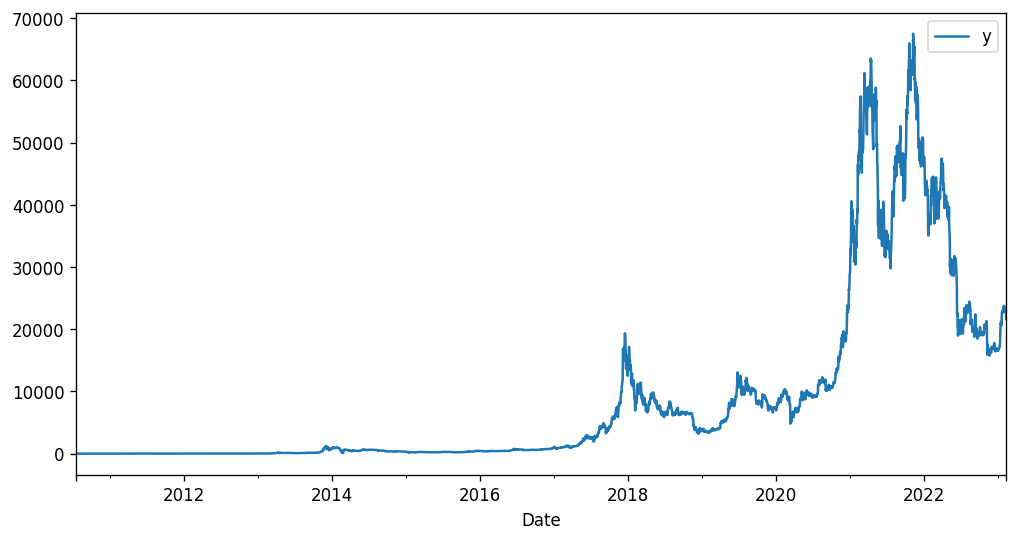

In [102]:
df.plot()

In [103]:
df["ds"] = df.index
df

,y,ds
Date,,
2010-07-18,0.1,2010-07-18
2010-07-19,0.1,2010-07-19
2010-07-20,0.1,2010-07-20
2010-07-21,0.1,2010-07-21
2010-07-22,0.1,2010-07-22
...,...,...
2023-02-07,22757.2,2023-02-07
2023-02-08,23263.4,2023-02-08
2023-02-09,22946.5,2023-02-09


11:19:48 - cmdstanpy - INFO - Chain [1] start processing
11:19:49 - cmdstanpy - INFO - Chain [1] done processing


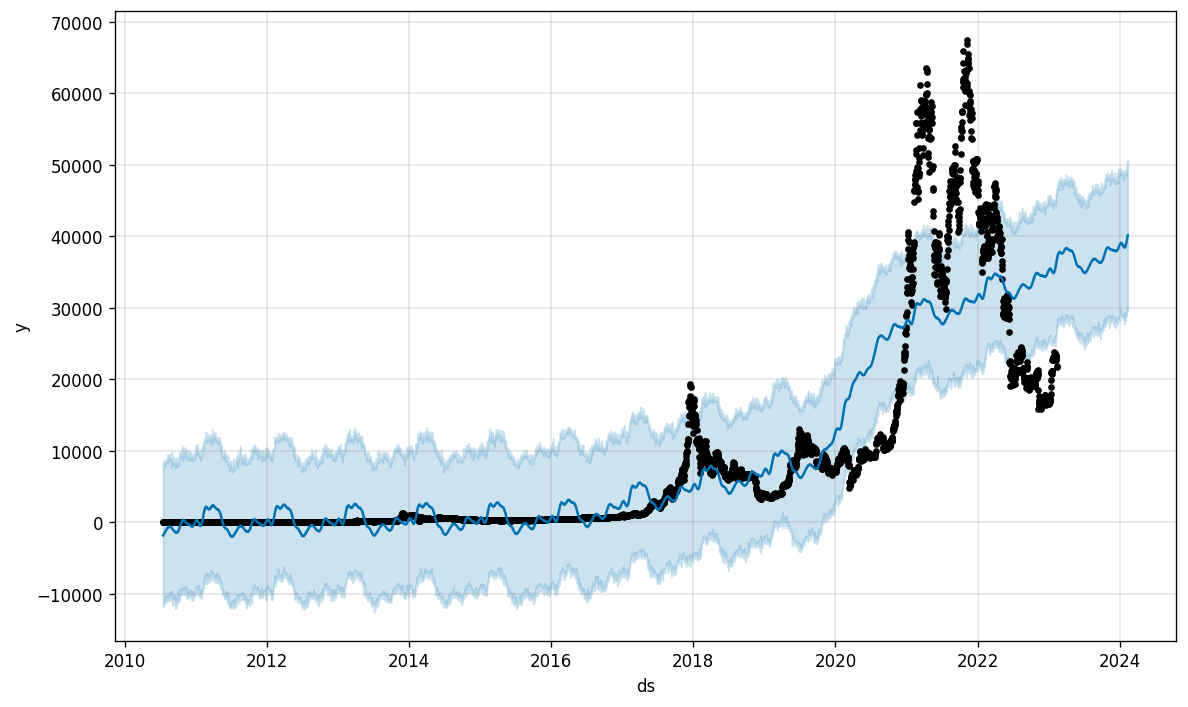

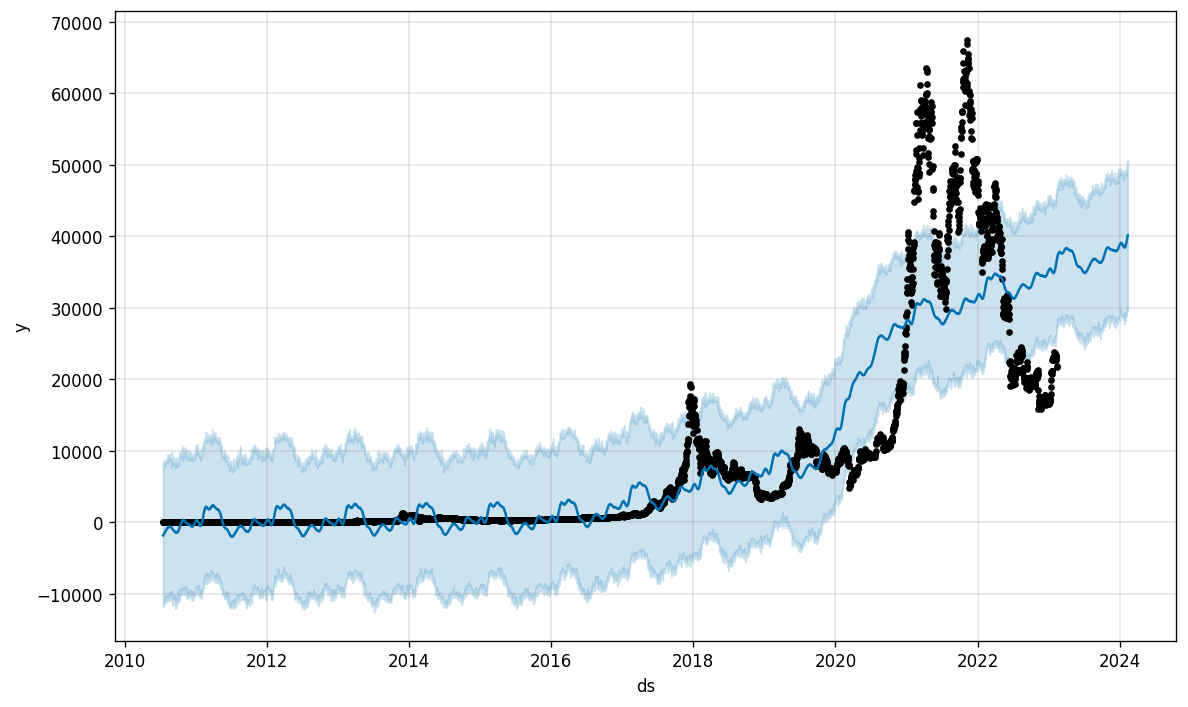

In [104]:
# Fit the Prophet model
# Cree una instancia de Prophet 
model = Prophet()
# Entrene el modelo con su conjunto de datos
model.fit(df)

# Cree un DataFrame para hacer predicciones
future = model.make_future_dataframe(periods=365) # "periods" es el número de períodos en el futuro que desea predecir.

# Haga las predicciones
forecast = model.predict(future)

# Grafique las predicciones
model.plot(forecast)

In [105]:
df["yLineal"] = df["y"]
df

,y,ds,yLineal
Date,,,
2010-07-18,0.1,2010-07-18,0.1
2010-07-19,0.1,2010-07-19,0.1
2010-07-20,0.1,2010-07-20,0.1
2010-07-21,0.1,2010-07-21,0.1
2010-07-22,0.1,2010-07-22,0.1
...,...,...,...
2023-02-07,22757.2,2023-02-07,22757.2
2023-02-08,23263.4,2023-02-08,23263.4
2023-02-09,22946.5,2023-02-09,22946.5


In [106]:
import math

df["y"] = df["yLineal"].apply(lambda x: math.log10(x))
df

,y,ds,yLineal
Date,,,
2010-07-18,-1.000000,2010-07-18,0.1
2010-07-19,-1.000000,2010-07-19,0.1
2010-07-20,-1.000000,2010-07-20,0.1
2010-07-21,-1.000000,2010-07-21,0.1
2010-07-22,-1.000000,2010-07-22,0.1
...,...,...,...
2023-02-07,4.357119,2023-02-07,22757.2
2023-02-08,4.366673,2023-02-08,23263.4
2023-02-09,4.360716,2023-02-09,22946.5


11:19:52 - cmdstanpy - INFO - Chain [1] start processing
11:19:54 - cmdstanpy - INFO - Chain [1] done processing


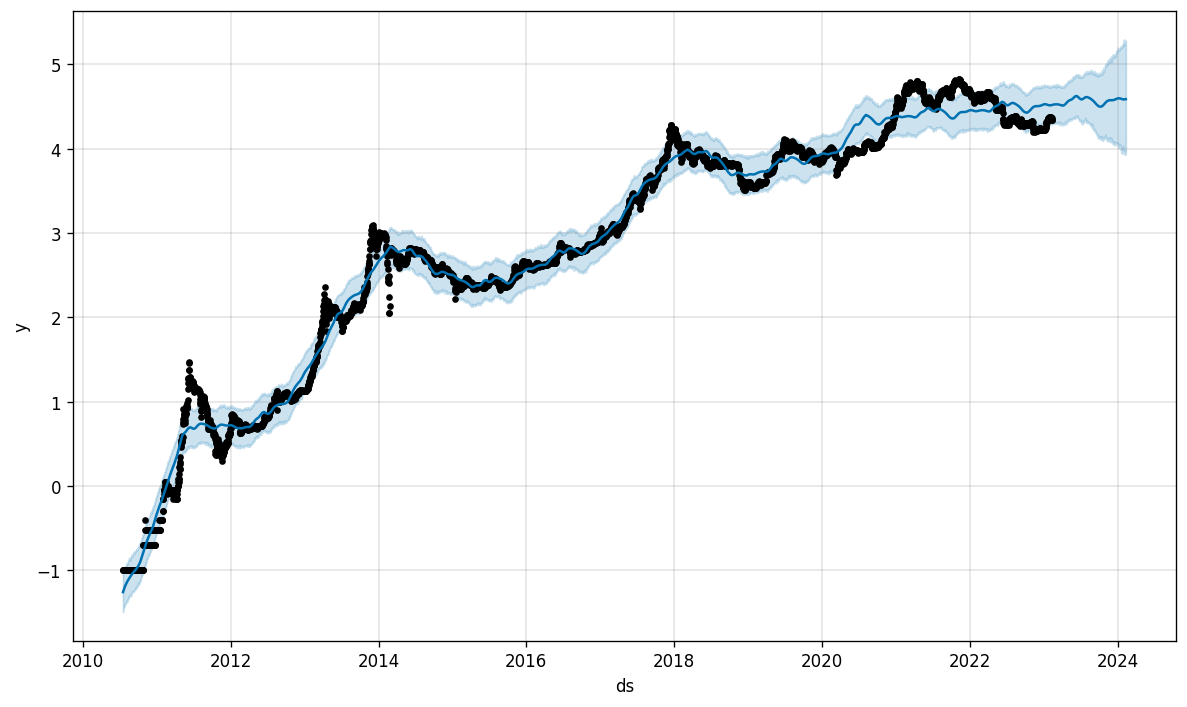

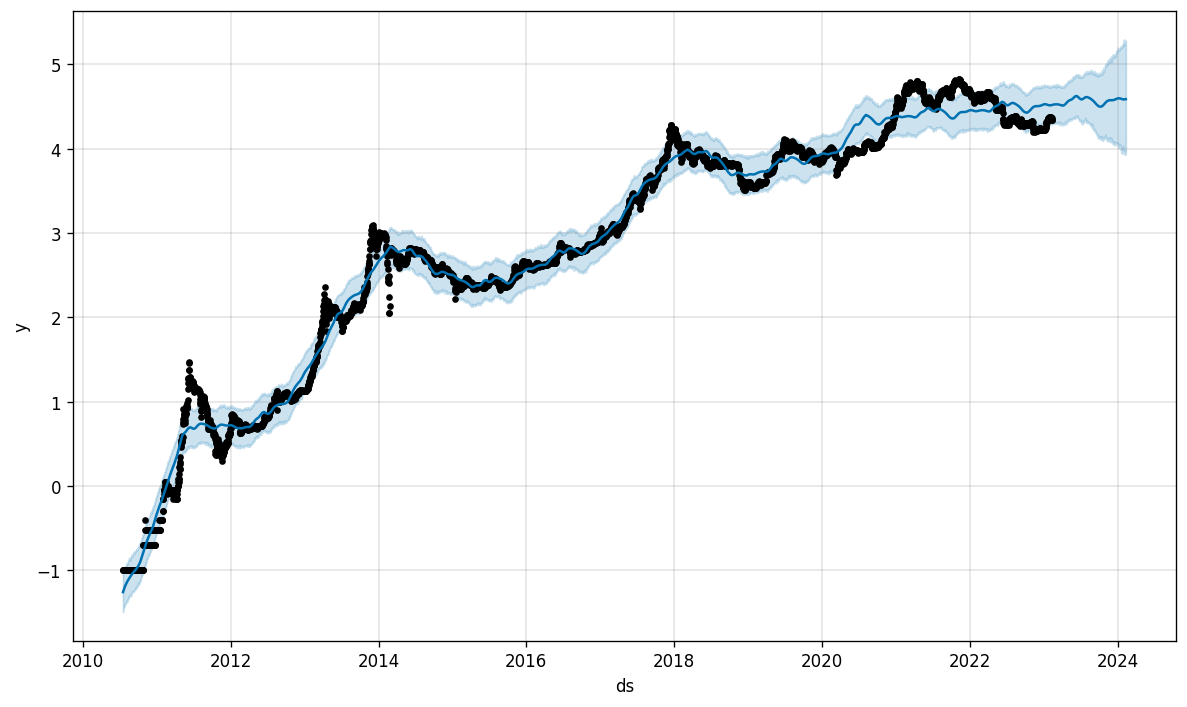

In [107]:
# Fit the Prophet model
# Cree una instancia de Prophet 
model = Prophet()
# Entrene el modelo con su conjunto de datos
model.fit(df)

# Cree un DataFrame para hacer predicciones
future = model.make_future_dataframe(periods=365) # "periods" es el número de períodos en el futuro que desea predecir.

# Haga las predicciones
forecast = model.predict(future)

# Grafique las predicciones
model.plot(forecast)

In [108]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-07-18,-1.296069,-1.494854,-1.041571,-1.296069,-1.296069,0.037797,0.037797,0.037797,-0.000654,-0.000654,-0.000654,0.038451,0.038451,0.038451,0.0,0.0,0.0,-1.258272
1,2010-07-19,-1.290514,-1.484895,-1.014435,-1.290514,-1.290514,0.039506,0.039506,0.039506,-0.000522,-0.000522,-0.000522,0.040028,0.040028,0.040028,0.0,0.0,0.0,-1.251008
2,2010-07-20,-1.284960,-1.459770,-1.010054,-1.284960,-1.284960,0.041606,0.041606,0.041606,0.000038,0.000038,0.000038,0.041568,0.041568,0.041568,0.0,0.0,0.0,-1.243354
3,2010-07-21,-1.279405,-1.454526,-1.019931,-1.279405,-1.279405,0.044107,0.044107,0.044107,0.001060,0.001060,0.001060,0.043046,0.043046,0.043046,0.0,0.0,0.0,-1.235298
4,2010-07-22,-1.273850,-1.435359,-1.010199,-1.273850,-1.273850,0.045000,0.045000,0.045000,0.000562,0.000562,0.000562,0.044438,0.044438,0.044438,0.0,0.0,0.0,-1.228851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,2024-02-07,4.598682,3.971223,5.239999,4.007368,5.203614,-0.011625,-0.011625,-0.011625,0.001060,0.001060,0.001060,-0.012686,-0.012686,-0.012686,0.0,0.0,0.0,4.587056
4953,2024-02-08,4.598873,3.935405,5.249300,4.004501,5.205900,-0.011819,-0.011819,-0.011819,0.000562,0.000562,0.000562,-0.012381,-0.012381,-0.012381,0.0,0.0,0.0,4.587055
4954,2024-02-09,4.599065,3.971118,5.246305,3.999467,5.208092,-0.011990,-0.011990,-0.011990,0.000038,0.000038,0.000038,-0.012028,-0.012028,-0.012028,0.0,0.0,0.0,4.587075
4955,2024-02-10,4.599257,3.931034,5.282461,3.997622,5.211666,-0.012160,-0.012160,-0.012160,-0.000523,-0.000523,-0.000523,-0.011637,-0.011637,-0.011637,0.0,0.0,0.0,4.587098


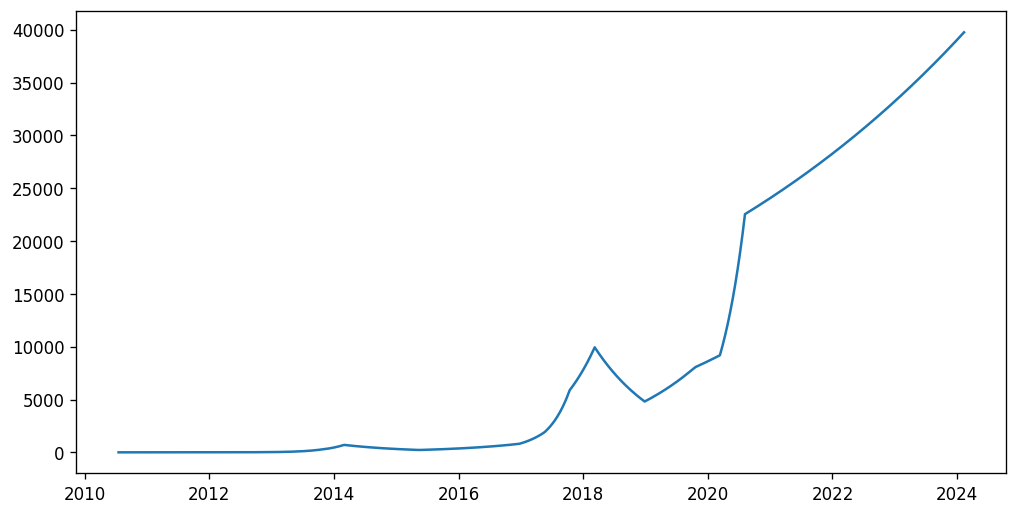

In [109]:
plt.plot(forecast["ds"], forecast["trend"].apply(lambda x: 10**x))